<a href="https://colab.research.google.com/github/TristanPartida/EDP-I/blob/main/ecuaciondeonda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

8⋅sin(π⋅x)⋅cos(π⋅t)   8⋅sin(3⋅π⋅x)⋅cos(3⋅π⋅t)   8⋅sin(5⋅π⋅x)⋅cos(5⋅π⋅t)
─────────────────── + ─────────────────────── + ───────────────────────
         2                        2                          2         
        π                      9⋅π                       25⋅π          


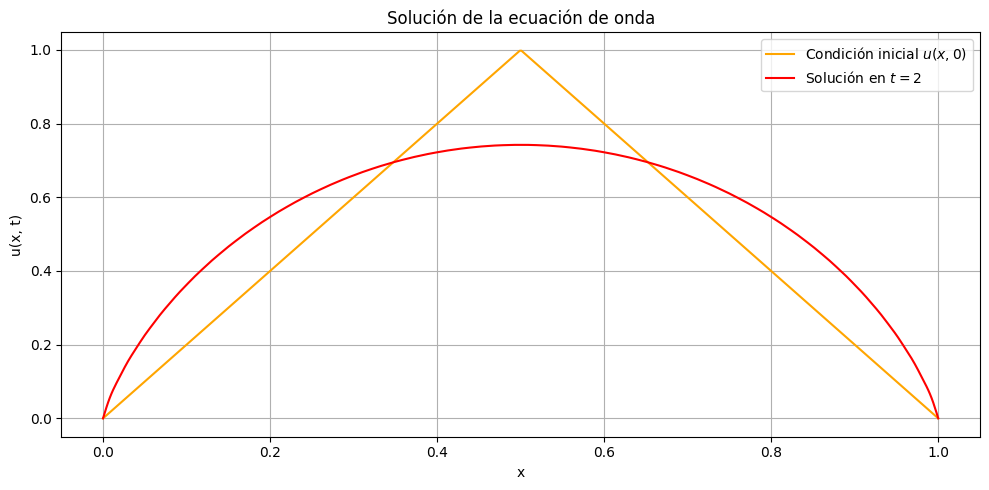

In [ ]:
import sympy as sp

# Declaramos variables simbólicas
x, t = sp.symbols('x t')
L = 1
k = 1
c = 1
N = 5  # Cambia este valor si quieres más términos en la serie

# Coeficiente general (solo impares)
def Bn(n):
    if n % 2 == 0:
        return 0
    return (8 * k) / (sp.pi**2 * n**2)

# Serie de Fourier truncada
u_expr = 0
for n in range(1, N+1):
    bn = Bn(n)
    term = bn * sp.sin(n * sp.pi * x / L) * sp.cos(n * sp.pi * c * t / L)
    u_expr += term

# Mostrar la expresión
sp.pprint(u_expr, use_unicode=True)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parámetros
L = 1         # Longitud de la cuerda
c = 1         # Velocidad de propagación
k = 1         # Altura máxima del triángulo inicial
N = 100       # Número de términos de la serie de Fourier
nx = 500      # Número de puntos espaciales
nt = 200      # Número de pasos de tiempo
T = 2         # Tiempo total de simulación

# Mallas de espacio y tiempo
x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)

# Condición inicial u(x,0): forma de triángulo
def f(x):
    return np.where(x < L/2, (2 * k / L) * x, (2 * k / L) * (L - x))

# Coeficientes Bn de la expansión en serie de Fourier
def Bn(n):
    if n % 2 == 0:  # Solo n impares tienen coeficientes distintos de cero
        return 0
    return (8 * k) / (np.pi**2 * n**2)

# Solución general u(x,t) usando la serie
def u(x, t):
    suma = np.zeros_like(x)
    for n in range(1, N + 1):
        bn = Bn(n)
        suma += bn * np.sin(n * np.pi * x / L) * np.cos(n * np.pi * c * t / L)
    return suma

# Evaluar la solución en todos los tiempos
U = np.array([u(x, ti) for ti in t])

# Graficar condición inicial y solución final
plt.figure(figsize=(10, 5))
plt.plot(x, f(x), label="Condición inicial $u(x,0)$", color='orange')
plt.plot(x, U[-1], label=f"Solución en $t={T}$", color='red')
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Solución de la ecuación de onda")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()